### UAS KAPITA SELEKTA DALAM KOMPUTASI

#### Nia Karunia Dewi 11160940000071

### 1. Dataset

Dataset yang saya gunakan disini adalah dataset yang saya peroleh dari https://www.kaggle.com/hesh97/titanicdataset-traincsv.
Dimana dataset tersebut merupakan data penumpang yang selamat dan penumpang yang tidak selamat dalam tragedi tenggelamnya kapal titanic pada tahun 1912. Tenggelamnya kapal titanic merupakan salah satu kapal karam paling terkenal dalam sejarah. Yaitu tepatnya pada tanggal 15 April 1912, kapal titanic tenggelam setelah bertabrakan dengan gunung es. Kejadian tersebut telah menewaskan 1502 penumpang dari total 2.224 penumpang dan awak.

### 2. Hipotesis

Tujuan saya melakukan analisis data ini adalah untuk mengetahui faktor yang paling memengaruhi dan menjadi penyebab korban meninggal dalam tragedi tenggelamnya kapal titanic. Disamping itu saya juga dapat mengetahui faktor yang memengaruhi tingkat keselamatan penumpang dilihat dari beberapa variabel yang tersedia. Terakhir saya akan mencoba membuat model prediksi penumpang yang selamat dengan menggunakan Random Forest Classifier.

### 3. Data Wrangling dan Preprocessing

#### Import Modul

In [22]:
# Import modul yang dibutuhkan
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline
plt.style.use('bmh'); sns.set()

print('Imported Module')

Imported Module


#### Import Data

In [23]:
# Importing data CSV 
data = pd.read_csv('titanic.csv')

In [5]:
# Menampilkan beberapa data pertama
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Menampilkan beberapa data terakhir
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Cek Tipe Data

In [8]:
# Tipe Datanya : DataFrame (df)
type(data)

# Ukuran Data
N, P = data.shape
print('baris = ', N, ', Kolom = ', P)

data.info()

baris =  891 , Kolom =  12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [24]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Dari info diatas dapat diketahui bahwa dataset yang digunakan memuat sebanyak 12 variabel yaitu PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, dan Embarked, dengan jumlah data dari masing masing variabel adalah sebanyak 891. Adapun variabel dari data penumpang titanic tersebut memiliki tipe data yang berbeda-beda yaitu ada tipe data integer, float, dan object. 

#### Variable Selection

In [25]:
# Drop beberapa kolom yang tidak akan saya gunakan

data.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Saya menghapus variabel PassengerId karena variabel tersebut hanya merupakan index yang tidak berguna, kemudian untuk variabel Ticket dan Cabin juga saya hapus karena tidak diperlukan dan tidak berpengaruh dalam menentukan keselamatan penumpang. Sehingga setelah dihapus beberapa kolom yang tidak perlukan, maka yang tersisa adalah variabel Survived, Pclass, Name, Sex, Age, SipSp, Parch, Fare, Embarked.


#### Preprocessing

#### 1) Missing Value Analysis

In [26]:
# Mengecek Missing Values
print(data.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


Dari hasil output diatas, terdapat beberapa variabel yang mengandung missing value yaitu Age sebanyak 177 nilai kosong dan Embarked sebanyak 2 nilai kosong. Akan tetapi ada kemungkinan bahwa terdapat missing value pada variabel Fare. Sehingga lakukan pengecekan lebih lanjut.

Untuk mengatasi missing value pada variabel Embarked, saya memilih untuk imputasi dengan modus.

In [42]:
# cek harga tiket
print('Harga tiket Tertinggi:',data['Fare'].max())
print('Harga Tiket Terendah:',data['Fare'].min())
print('Harga Tiket Rata rata:',data['Fare'].mean())

Harga tiket Tertinggi: 512.3292
Harga Tiket Terendah: 0.0
Harga Tiket Rata rata: 32.2042079685746


In [43]:
print((data.Fare == 0).sum())

15


Telihat bahwa terdapat 15 nilai nol pada harga tiket. Oleh karena itu, kita harus menandainya sebagai nilai kosong karena harga tiket tidak mungkin gratis dan harus memiliki nilai yang lebih besar dari nol.

In [44]:
# ganti nilai nol menjadi NaN
data.Fare = data.Fare.replace(0, np.NaN)

In [45]:
# cek apakah masih terdapat nilai nol atau tidak
print((data.Fare == 0).sum())

0


##### Mengatasi Missing Value pada Variabel Fare

In [46]:
# Isi missing value pada Fare dengan median fare dari setiap Pclass
data["Fare"].fillna(data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title,initial,Initial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,Mr,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,Mrs,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,Miss,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,Mrs,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,Mr,Mr


In [48]:
# cek missing value kembali
data.Fare.isnull().any()

False

Setelah dicek ternyata sudah tidak ada nilai yang kosong pada variabel Fare

##### Mengatasi Missing Value pada variable Embarked

In [52]:
Embarked : {'S', 'C', 'Q'}
    
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
data['Embarked'].fillna('S',inplace=True) # Mengisi dengan modus dari Embarked yaitu, S

In [28]:
# Cek kembali apakah masih terdapat missing value atau tidak
data.Embarked.isnull().any()

False

##### Mengatasi Missing Value pada variabel Age

In [34]:
print('Usia penumpang paling tua:',data['Age'].max(),'tahun')
print('Usia penumpang paling muda:',data['Age'].min(),'tahun')
print('Rata rata usia penumpang:',data['Age'].mean(),'tahun')

Usia penumpang paling tua: 80.0 tahun
Usia penumpang paling muda: 0.42 tahun
Rata rata usia penumpang: 29.69911764705882 tahun


Seperti yang telah kita cek sebelumnya, bahwa variabel Age memiliki 177 nilai kosong. Untuk mengganti nilai nilai kosong tersebut salah satu cara yang dapat kita lakukan adalah mengisinya dengan usia rata-rata dalam dataset. 

Akan tetapi dalam dataset tersebut terdapat banyak penumpang dengan berbagai usia. Misalnya untuk anak usia 0-5 tahun akan menghasilkan error yang cukup besar jika diisi dengan usia rata rata yaitu 29 tahun. Sehingga salah satu cara yang dapat dilakukan adalah dengan memeriksa variabel Name, dari nama penumpang kita dapat melihat bahwa dalam nama-nama tersebut terdapat kata Mr. atau Mrs. dsb. Dengan demikian dapat lebih mudah dalam menetapkan nilai rata-rata dalam masing-masing kelompok usia.

In [39]:
# Memperoleh inisial dari nama

data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') 
    
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') # Cek inisial dengan variabel Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Dalam kasus ini kita menggunakan Regex: ([A-Za-z] +)\.. Dengan mencari string yang terletak di antara A-Z atau a-z dan diikuti oleh . (Titik). Sehingga akan menghasilkan Inisial dari Nama.

Terlihat bahwa ada beberapa inisial yang salah eja seperti Mlle atau Mme yang mewakili Miss. Oleh karena itu, kita akan menggantinya dengan Miss dan hal yang sama untuk nilai-nilai lainnya.

In [40]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

data.groupby('Initial')['Age'].mean() # Cek rata rata usia berdasarkan inisial nama

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [41]:
# Mengisi Missing Value 

data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

data.Age.isnull().any() # Cek missing value kembali

False

Missing value pada variabel Age berhasil diatasi.

#### 2) Outlier Analysis

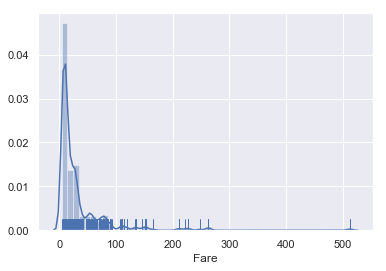

In [50]:
# Mengecek outlier pada variabel fare dan age

p = sns.distplot(data['Fare'], kde=True, rug=True)

Dari hasil grafik diatas, terlihat bahwa variabel Fare tidak berdistribusi normal dan terdapat outlier, sehingga akan dilakukan penghapusan outlier pada variabel Fare tersebut yang kemudian akan disimpan pada variabel baru (data2).

In [57]:
data2 = data[np.abs(data.Fare - data.Fare.mean())<=(3*data.Fare.std())] # Data tanpa outliers
print(data2.shape, data.shape)

(871, 12) (891, 12)


Dari hasil output, terlihat perubahan ukuran dari data sebelum dihapus outlier (data) dengan ukuran data setelah dilakukan penghapusan outlier (data2).

Lakukan pengecekan distribusi pada data yang sudah dilakukan penghapusan outlier.

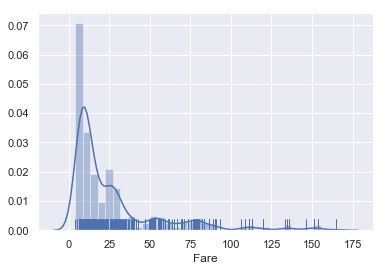

In [58]:
# Distribusi Fare pada data2

p = sns.distplot(data2['Fare'], kde=True, rug=True)

Dari visualisasi distribusi data pada data2 terlihat data sudah berdistribusi normal karena distribusi sudah berbentuk seperti bentuk lonceng. 

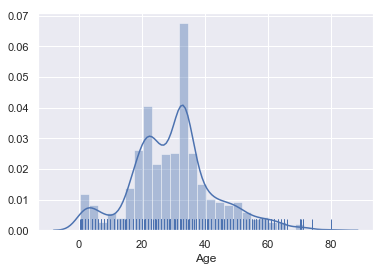

In [51]:
# Distribusi variabel Age

p = sns.distplot(data['Age'], kde=True, rug=True)

Data pada variabel Age tersebar normal.

#### 3) Membuat variabel baru berdasarkan variabel yang sudah ada

Disini saya membuat variabel baru dengan nama Family yang merupakan gabungan dari variabel SibSp dan Parch. Dimana Parch menyatakan jumlah orang tua/anak yang ikut naik bersama dan SibSp menyatakan jumlah saudara atau pasangan yang ikut naik bersama. Sehingga memang kedua variabel tersebut saling berhubungan dan dapat digabungkan menjadi satu variabel saja. Dengan menggabungkan kedua variabel tersebut maka analisis data pun dapat menjadi lebih mudah. 

In [90]:
data2['Family'] = data2.SibSp + data2.Parch

In [64]:
data2.drop(['SibSp','Parch'], axis=1, inplace=True)

In [65]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
Initial     891 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 48.8+ KB


### 4. Analisa EDA

#### 1) Basic Statistic

In [66]:
#Statistika deskriptif data dari semua variabel(termasuk data kategorik)

data2.describe(include='all')

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Initial,Family
count,891.000000,891.000000,891,891,891.000000,891.000000,891,891,891.000000
unique,NaN,NaN,891,2,NaN,NaN,3,5,NaN
top,NaN,NaN,"Navratil, Master. Edmond Roger",male,NaN,NaN,S,Mr,NaN
freq,NaN,NaN,1,577,NaN,NaN,646,529,NaN
mean,0.383838,2.308642,NaN,NaN,29.841942,32.689318,NaN,NaN,0.904602
std,0.486592,0.836071,NaN,NaN,13.281525,49.611639,NaN,NaN,1.613459
min,0.000000,1.000000,NaN,NaN,0.420000,4.012500,NaN,NaN,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,7.925000,NaN,NaN,0.000000
50%,0.000000,3.000000,NaN,NaN,30.000000,14.500000,NaN,NaN,0.000000
75%,1.000000,3.000000,NaN,NaN,36.000000,31.275000,NaN,NaN,1.000000


#### 2) Visualisasi Data

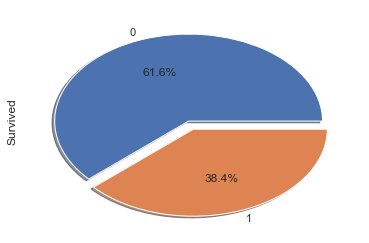

In [61]:
# Visualisasi dari informasi distribusi data, melihat jumlah penumpang yang selamat dan yang tidak selamat
# PieChart
Survived : {0,1}
plot = data2.Survived.value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)

Dari pie chart di atas dapat dilihat bahwa penumpang yang selamat lebih sedikit dari jumlah penumpang yang tidak selamat yaitu hanya 38,4% dari jumlah seluruh penumpang. Dalam dataset yang saya gunakan, dari total penumpang sebanyak 891 hanya sekitar 350 penumpang saja yang selamat.

##### Univariate Analysist

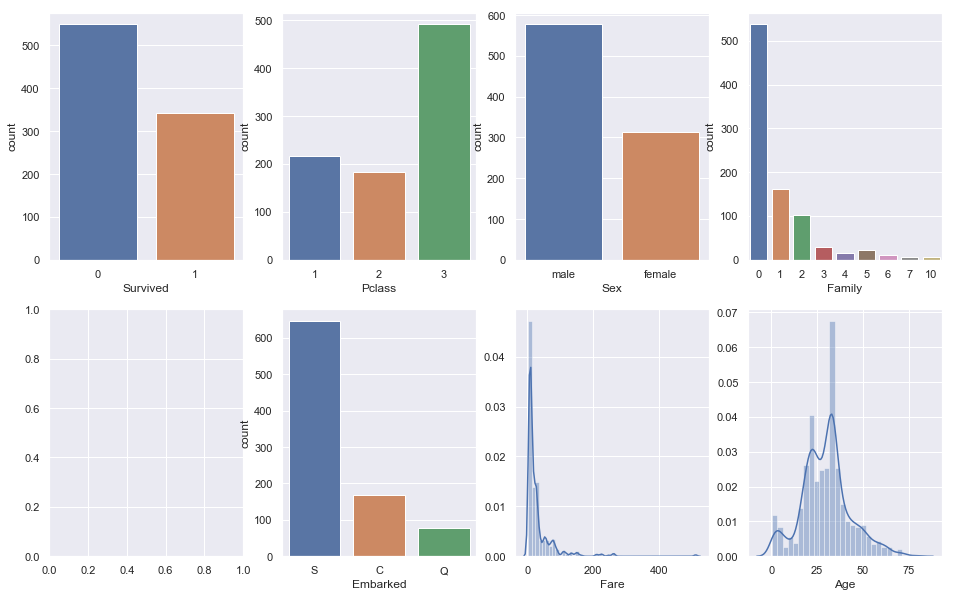

In [73]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=data2,ax=axes[0,0])
sns.countplot('Pclass',data=data2,ax=axes[0,1])
sns.countplot('Sex',data=data2,ax=axes[0,2])
sns.countplot('Family',data=data2,ax=axes[0,3])
sns.countplot('Embarked',data=data2,ax=axes[1,1])
sns.distplot(data2['Fare'], kde=True,ax=axes[1,2])
sns.distplot(data2['Age'].dropna(),kde=True,ax=axes[1,3])

##### Melihat jumlah penumpang yang selamat dan yang tidak selamat berdasarkan Pclass

In [26]:
# Melihat penumpang yang selamat berdasarkan kelas penumpang

data2[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Terlihat bahwa penumpang di Pclass1 memiliki tingkat keselamatan penumpang yang lebih baik dibandingan dengan Pclass 2 dan Pclass 3 yaitu sekitar 60%. Sedangkan penumpang di Pclass 3 memiliki tingkat keselamatan penumpang yang terburuk yaitu sekitar 22%.

##### Melihat jumlah penumpang yang selamat dan yang tidak selamat berdasarkan gender

In [27]:
#Hubungan Survived dengan Sex 

data2[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [71]:
data2.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

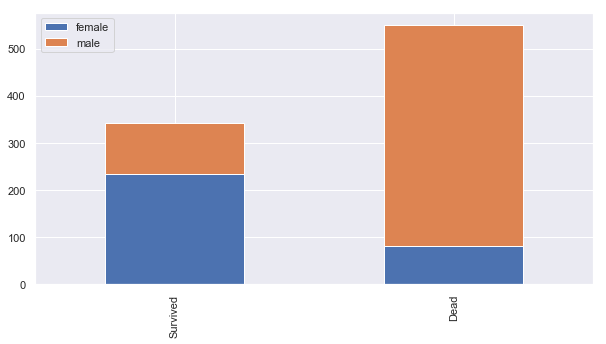

In [78]:
def bar_chart(feature):
    survived = data2[data2['Survived']==1][feature].value_counts()
    dead = data2[data2['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

# Berdasarkan gender
bar_chart('Sex')

Dari diagram pada univariate analisi terlihat bahwa jumlah penumpang laki laki jauh lebih banyak dibandingkan penumpang perempuan. Akan tetapi dari diagram diatas kita dapat melihat tingkat kelangsungan hidup penumpang wanita secara signifikan lebih tinggi dibandingkan dengan pria. Dimana tingkat bertahan hidup pria adalah sekitar 20% sedangkan tingkat bertahan hidup wanita adalah sekitar 75% yang menunjukkan bahwa gender memiliki hubungan yang kuat dengan tingkat kelangsungan hidup. Yaitu dapat dikatakan bahwa tingkat kelangsungan hidup perempuan lebih tinggi dibadingkan dengan tingkat kelangsungan hidup laki laki.

##### Melihat jumlah penumpang yang selamat dan yang tidak selamat berdasarkan Embarked

In [75]:
data2.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

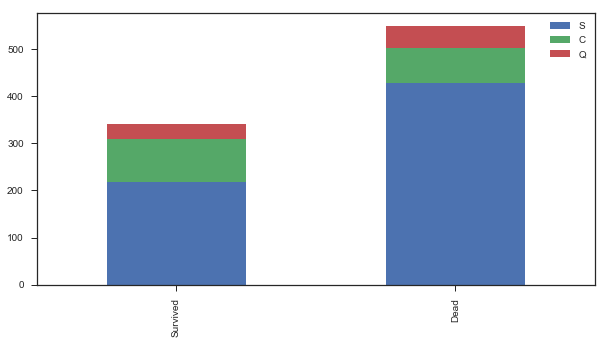

In [77]:
bar_chart('Embarked')

Dengan melihat variabel embarked, penumpang dari pelabuhan C memiliki tingkat kelangsungan hidup yang tinggi, sedangkan penumpang dari pelabuhan S lebih banyak yang meninggal dan memiliki tingkat kelangsungan hidup yang rendah.

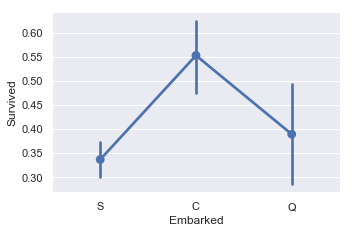

In [10]:
sns.factorplot('Embarked','Survived',data=data2)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Peluang tertinggi untuk penumpang selamat berada di C yaitu sekitar 0,55 sedangkan peluang terendah yaitu di S.

##### Melihat jumlah penumpang yang selamat dan tidak selamat berdasarkan sex, embarked, dan pclass secara bersama sama

In [9]:
pd.crosstab([data2.Embarked,data2.Pclass],[data2.Sex,data2.Survived],margins=True).style.background_gradient(cmap='summer_r')

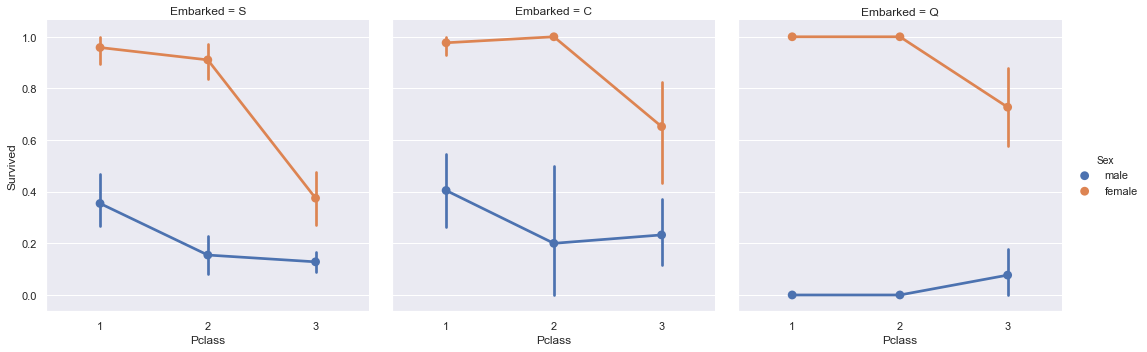

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data2)
plt.show()

Dari factorplot kita dapat mengetahui bahwa peluang bertahan hidup untuk penumpang wanita hampir mendekati 1 baik itu untuk Pclass1 dan Pclass2.

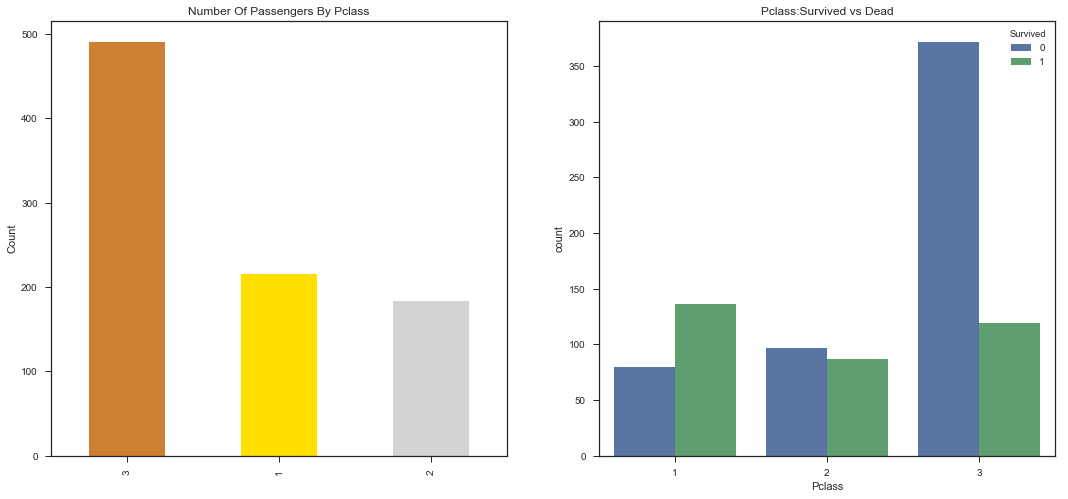

In [79]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data2['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data2,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Dari diagram yang pertama kita dapat melihat bahwa jumlah penumpang di Pclass 3 paling banyak dibandingkan dengan penumpang di Pclass 1 dan Pclass 2. Akan tetapi, diagram yang kedua menunjukkan bahwa jumlah penumpang yang selamat paling banyak di Pclass 1 dan penumpang meninggal paling banyak di Pclass 3. Hal tersebut dikarenakan penumpang di Pclass 1 menjadi prioritas dalam pelayanan serta dalam upaya penyelamatan. 

##### Melihat tingkat kelangsungan hidup berdasarkan sex dan pclass secara bersama sama

In [81]:
pd.crosstab([data2.Sex,data.Survived],data2.Pclass,margins=True).style.background_gradient(cmap='summer_r')

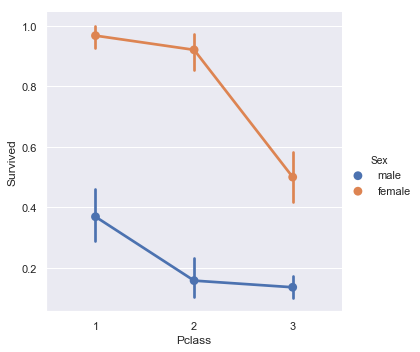

In [4]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data2)
plt.show()

Dengan menggunakan FactorPlot pemisahan nilai kategorik menjadi lebih mudah. Dari factorplot di atas dapat disimpulkan bahwa kelangsungan hidup penumpang perempuan dari Pclass1 adalah sekitar 95-96% karena hanya 3 dari 94 penumpang perempuan di Pclass1 yang meninggal.

Jelas bahwa terlepas dari Pclass, penumpang perempuan diberi prioritas pertama saat penyelamatan. Bahkan Pria dari Pclass1 memiliki tingkat kelangsungan hidup yang sangat rendah.

##### Melihat penumpang yang selamat dan tidak selamat berdasarkan Age

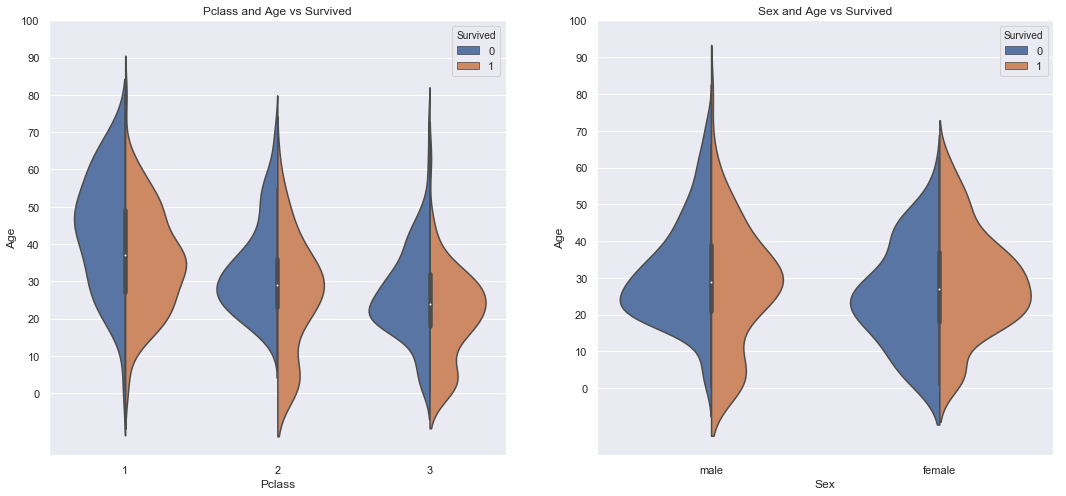

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data2,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data2,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Dari violinplot di atas yaitu dengan melihat variabel Pclass, Age, dan Sex, terlihat bahwa peluang selamat bagi penumpang perempuan yang berusia 20-50 tahun cukup tinggi. Sedangkan untuk penumpang laki laki, peluang selamat semakin menurun dengan bertambahnya usia.

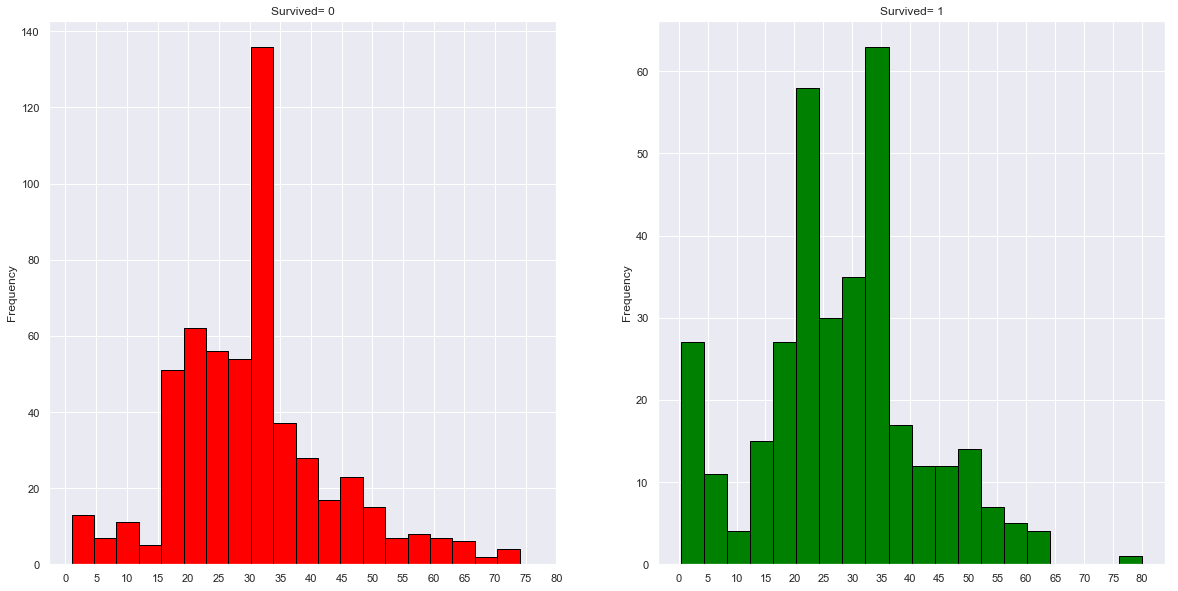

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data2[data2['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data2[data2['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Balita yang berusia lebih dari 5 tahun banyak yang diselamatkan, karena perempuan dan anak anak lebih diprioritaskan. Selain itu juga berlaku untuk penumpang dengan usia 80 tahun ke atas. Rata rata kematian terbanyak berasal dari penumpang yang berusia antara 30 sampai 40 tahun.

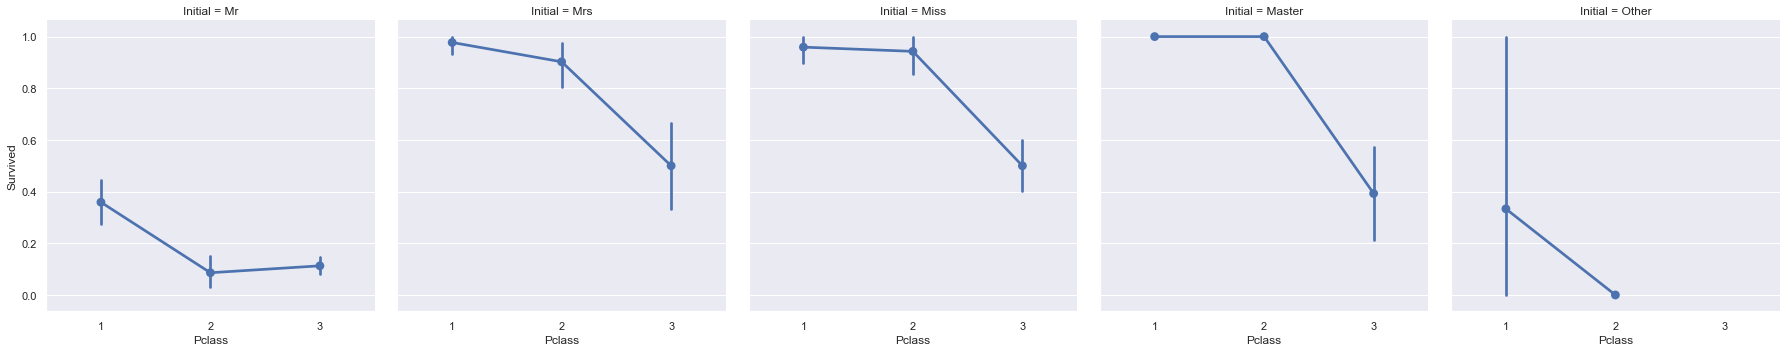

In [8]:
sns.factorplot('Pclass','Survived',col='Initial',data=data2)
plt.show()

Terlihat bahwa penumpang perempuan dan anak anak menjadi prioritas utama dalam upaya penyelamatan, baik itu di Pclass 1, 2, dan 3.

##### Melihat jumlah penumpang yang selamat dan yang tidak selamat berdasarkan Family

In [76]:
#Hubungan Survived dengan Family (jumlah orang tua/anak, istri dan kerabat yang ikut naik bersama)

pd.crosstab([data2.Family],data2.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Family,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


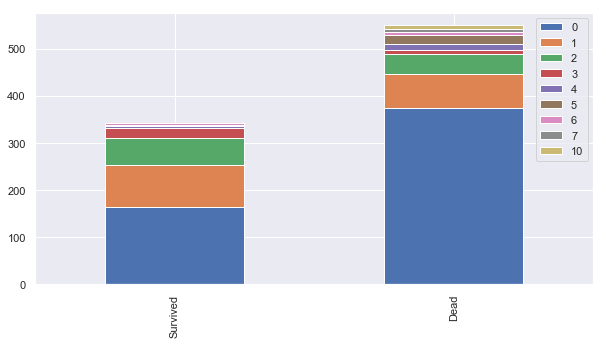

In [79]:
bar_chart('Family')

Terlihat bahwa seseorang yang naik dengan lebih dari 2 anggota keluarga lebih banyak yang selamat. Sedangkan yang meninggal lebih banyak dari penumpang yang tidak naik dengan anggota keluarga.

In [80]:
pd.crosstab(data2.Family,data2.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Family,,,
0,109,104,324
1,70,34,57
2,24,31,47
3,7,13,9
4,2,1,12
5,4,1,17
6,0,0,12
7,0,0,6
10,0,0,7


Dari bar chart dan crosstab diatas terlihat bahwa seorang penumpang yang naik dengan lebih dari 2 anggota keluarga cenderung lebih banyak yang selamat. Sedangkan penumpang yang naik sendiri lebih banyak yang meningal. Sehingga kemungkinan jika kita memiliki anggota keluarga yang ikut naik bersama, maka kita akan mencoba menyelamatkan mereka alih-alih menyelamatkan diri terlebih dahulu.

Peluang bertahan hidup dapat dikatakan baik untuk penumpang yang memiliki 1-3 anggota keluarga yang ikut naik bersama di kapal. Akan tetapi peluang bertahan hidup semakin berkurang ketika seseorang memiliki lebih dari 4 anggota keluarga.

Crosstab juga menunjukkan bahwa penumpang dengan jumlah anggota keluarga lebih dari 3 maka semuanya ada di Pclass 3. Artinya keluarga besar berada di Pclass 3.

##### Correlation Data

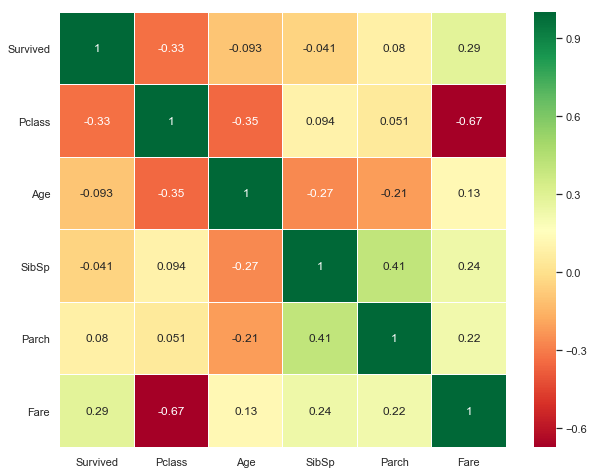

In [89]:
# HeatMap untuk menyelidiki korelasi

sns.heatmap(data2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

##### Kesimpulan

Jika dilihat dari semua variabel, maka kita dapat menyimpulkan beberapa hal, yaitu

Berdasarkan Gender: Peluang untuk bertahan hidup bagi penumpang wanita jauh lebih tinggi dibandingkan dengan peluang hidup penumpang laki laki.

Berdasarkan Pclass: Menjadi penumpang pada Pclass 1 ternyata memang dapat memberikan keuntungan yang besar untuk para penumpangnya, karena mereka menjadi prioritas dalam pelayanan maupun dalam upaya penyelamatan. Sehingga peluang bertahan hidup pun lebih besar. Berbeda dengan penumpang di Pclass 3 yang memiliki tingkat kelangsungan hidup yang sangat rendah. Adapun bagi penumpang wanita, peluang bertahan hidup dari Pclass 1 hampir mendekati angka 1 dan begitupun bagi penumpang wanita dari Pclass 2. Sehingga dalam hal ini uang cukup berpengaruh.

Berdasarkan Usia: Anak-anak dengan usia 5-10 tahun memiliki peluang bertahan hidup yang tinggi. Sedangkan bagi penumpang yang berusia antara 15-35 lebih banyak yang meninggal.

Berdasarkan Embarked: Dengan melihat variabel embarked, penumpang dari pelabuhan C memiliki tingkat kelangsungan hidup yang tinggi, sedangkan penumpang dari pelabuhan S lebih banyak yang meninggal dan memiliki tingkat kelangsungan hidup yang rendah. Hal ini terlihat cukup menarik, dimana kita tahu bahwa mayoritas penumpang Pclass 1 di S dan penumpang di Q semuanya penumpang dari Pclass 3.

Berdasarkan Family: Penumpang yang naik bersama dengan 1-2 anggota keluarga baik itu pasangan, orang tua ataupun kerabat menunjukkan kemungkinan bertahan hidup yang lebih besar daripada penumpang yang naik sendiri tanpa ditemani dengan keluarga besar. Sehingga kemungkinan jika kita memiliki anggota keluarga yang ikut naik bersama, maka kita akan mencoba menyelamatkan mereka alih-alih menyelamatkan diri terlebih dahulu.

#### 3) Predicting Survival based on Random Forest Model 

In [81]:
data2.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked',
       'Initial', 'Family'],
      dtype='object')

In [91]:
dataML = data2[['Survived', 'Pclass', 'Name', 'Sex', 'Age','Fare','Embarked', 'Initial', 'Family']]

In [83]:
# Cek Missing Value
dataML.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
Initial     0
Family      0
dtype: int64

In [86]:
from sklearn.ensemble import RandomForestClassifier
x =dataML[['Age','Fare','Family']].values # Hanya mengambil data numerik
y = dataML['Survived'].values
RF = RandomForestClassifier()
RF.fit(x, y)

# Make a prediction
y_predict = RF.predict(x)
y_predict[:10]
(y == y_predict).mean()

0.9506172839506173

Terlihat akurasi dari model yang sangat baik yaitu sebesar 0.95.

##### Menyimpan Data Baru Hasil Preprocessing

In [87]:
data2.to_csv("Data_Preprocessed.csv", encoding='utf8')